In [189]:
import pandas as pd
import numpy as np
import re
from sklearn import preprocessing

In [190]:
FILE_PATH = "../Data/numerical.csv"

In [191]:
df = pd.read_csv(FILE_PATH, encoding='utf-8')

In [192]:
df = df.dropna()

In [193]:
df

,brand,model,OS,RAM,approx_price_EUR,battery_removable,battery_type,battery_mah,CPU_cores,CPU_speed,primary_camera_mp,secondary_camera_mp,internal_memory_gb
0,Acer,Iconia Talk S,Android,2.000,170.0,False,Li-Ion,3400.0,4,1.30,13.0,2.0,32.0
1,Acer,Liquid Z6 Plus,Android,3.000,250.0,True,Li-Po,4080.0,8,1.30,13.0,5.0,32.0
2,Acer,Liquid Z6,Android,1.000,120.0,True,Li-Ion,2000.0,4,1.25,8.0,2.0,8.0
4,Acer,Liquid X2,Android,3.000,230.0,True,Li-Po,4020.0,8,1.30,13.0,13.0,32.0
5,Acer,Liquid Zest Plus,Android,2.000,200.0,False,Li-Ion,5000.0,4,1.30,13.0,5.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,ZTE,Grand X LTE T82,Android,1.000,340.0,True,Li-Ion,1900.0,2,1.50,8.0,1.3,4.0
2068,ZTE,Grand X V970,Android,1.000,230.0,True,Li-Ion,1600.0,1,1.00,5.0,0.6,4.0
2069,ZTE,Optik,Android,1.000,230.0,False,Li-Ion,4000.0,2,1.20,5.0,2.0,16.0
2070,ZTE,Light Tab 2 V9A,Android,0.512,250.0,False,Li-Ion,3400.0,1,1.40,3.2,0.6,4.0


### Convertir columnas str a valores numéricos

In [194]:
str_cols = ['brand', 'OS', 'battery_removable', 'battery_type']

In [195]:
le = preprocessing.LabelEncoder()

# apply "le.fit_transform"
df_encoded = df[str_cols].apply(le.fit_transform)

In [196]:
df_encoded

,brand,OS,battery_removable,battery_type
0,0,0,0,0
1,0,0,1,1
2,0,0,1,0
4,0,0,1,1
5,0,0,0,0
...,...,...,...,...
2067,56,0,1,0
2068,56,0,1,0
2069,56,0,0,0
2070,56,0,0,0


In [197]:
df_numerical = df.drop(str_cols, axis=1)
df_numerical

,model,RAM,approx_price_EUR,battery_mah,CPU_cores,CPU_speed,primary_camera_mp,secondary_camera_mp,internal_memory_gb
0,Iconia Talk S,2.000,170.0,3400.0,4,1.30,13.0,2.0,32.0
1,Liquid Z6 Plus,3.000,250.0,4080.0,8,1.30,13.0,5.0,32.0
2,Liquid Z6,1.000,120.0,2000.0,4,1.25,8.0,2.0,8.0
4,Liquid X2,3.000,230.0,4020.0,8,1.30,13.0,13.0,32.0
5,Liquid Zest Plus,2.000,200.0,5000.0,4,1.30,13.0,5.0,16.0
...,...,...,...,...,...,...,...,...,...
2067,Grand X LTE T82,1.000,340.0,1900.0,2,1.50,8.0,1.3,4.0
2068,Grand X V970,1.000,230.0,1600.0,1,1.00,5.0,0.6,4.0
2069,Optik,1.000,230.0,4000.0,2,1.20,5.0,2.0,16.0
2070,Light Tab 2 V9A,0.512,250.0,3400.0,1,1.40,3.2,0.6,4.0


In [198]:
categorical_df = df_numerical.join(df_encoded)

In [199]:
categorical_df

,model,RAM,approx_price_EUR,battery_mah,CPU_cores,CPU_speed,primary_camera_mp,secondary_camera_mp,internal_memory_gb,brand,OS,battery_removable,battery_type
0,Iconia Talk S,2.000,170.0,3400.0,4,1.30,13.0,2.0,32.0,0,0,0,0
1,Liquid Z6 Plus,3.000,250.0,4080.0,8,1.30,13.0,5.0,32.0,0,0,1,1
2,Liquid Z6,1.000,120.0,2000.0,4,1.25,8.0,2.0,8.0,0,0,1,0
4,Liquid X2,3.000,230.0,4020.0,8,1.30,13.0,13.0,32.0,0,0,1,1
5,Liquid Zest Plus,2.000,200.0,5000.0,4,1.30,13.0,5.0,16.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,Grand X LTE T82,1.000,340.0,1900.0,2,1.50,8.0,1.3,4.0,56,0,1,0
2068,Grand X V970,1.000,230.0,1600.0,1,1.00,5.0,0.6,4.0,56,0,1,0
2069,Optik,1.000,230.0,4000.0,2,1.20,5.0,2.0,16.0,56,0,0,0
2070,Light Tab 2 V9A,0.512,250.0,3400.0,1,1.40,3.2,0.6,4.0,56,0,0,0


In [200]:
df_clases = categorical_df.drop('model', axis=1)
df_clases

,RAM,approx_price_EUR,battery_mah,CPU_cores,CPU_speed,primary_camera_mp,secondary_camera_mp,internal_memory_gb,brand,OS,battery_removable,battery_type
0,2.000,170.0,3400.0,4,1.30,13.0,2.0,32.0,0,0,0,0
1,3.000,250.0,4080.0,8,1.30,13.0,5.0,32.0,0,0,1,1
2,1.000,120.0,2000.0,4,1.25,8.0,2.0,8.0,0,0,1,0
4,3.000,230.0,4020.0,8,1.30,13.0,13.0,32.0,0,0,1,1
5,2.000,200.0,5000.0,4,1.30,13.0,5.0,16.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2067,1.000,340.0,1900.0,2,1.50,8.0,1.3,4.0,56,0,1,0
2068,1.000,230.0,1600.0,1,1.00,5.0,0.6,4.0,56,0,1,0
2069,1.000,230.0,4000.0,2,1.20,5.0,2.0,16.0,56,0,0,0
2070,0.512,250.0,3400.0,1,1.40,3.2,0.6,4.0,56,0,0,0


# Normalizar

In [201]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
from sklearn.decomposition import PCA


cols = ['approx_price_EUR', 'CPU_speed', 'battery_mah', 'primary_camera_mp', 'secondary_camera_mp', 'RAM']

X = df_clases[cols]
y = df_clases['CPU_cores']


In [202]:
X

,approx_price_EUR,CPU_speed,battery_mah,primary_camera_mp,secondary_camera_mp,RAM
0,170.0,1.30,3400.0,13.0,2.0,2.000
1,250.0,1.30,4080.0,13.0,5.0,3.000
2,120.0,1.25,2000.0,8.0,2.0,1.000
4,230.0,1.30,4020.0,13.0,13.0,3.000
5,200.0,1.30,5000.0,13.0,5.0,2.000
...,...,...,...,...,...,...
2067,340.0,1.50,1900.0,8.0,1.3,1.000
2068,230.0,1.00,1600.0,5.0,0.6,1.000
2069,230.0,1.20,4000.0,5.0,2.0,1.000
2070,250.0,1.40,3400.0,3.2,0.6,0.512


In [203]:
target_names = pd.unique(df_clases['CPU_cores'])

In [204]:
target_names

array([ 4,  8,  6,  2,  1,  3, 10])

In [205]:
scaler.fit(X)
X = scaler.transform(X)
X

array([[-0.12006156, -0.30171579,  0.46423153,  0.94926089, -0.31228131,
         0.44204575],
       [-0.00769077, -0.30171579,  0.94214649,  0.94926089,  0.64851877,
         1.42489446],
       [-0.1902933 , -0.42893215, -0.51971104, -0.16752361, -0.31228131,
        -0.54080297],
       ...,
       [-0.03578347, -0.5561485 ,  0.8859212 , -0.83759431, -0.31228131,
        -0.54080297],
       [-0.00769077, -0.04728309,  0.46423153, -1.23963673, -0.76065468,
        -1.02043314],
       [-0.06387616, -1.0650139 , -0.94140071, -0.83759431, -0.95281469,
        -1.02043314]])

# PCA

In [206]:
pca = PCA(n_components=len(cols))
model = pca.fit(X)
print(model.explained_variance_)

[3.06222836 0.97139443 0.94947725 0.5390374  0.2948233  0.18623075]


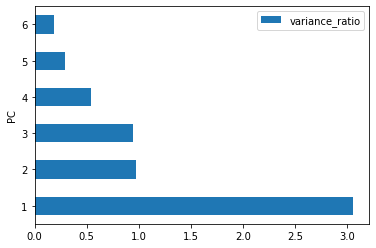

In [207]:
df_pc = pd.DataFrame({'PC':[1,2,3,4,5,6], 'variance_ratio':model.explained_variance_})
ax = df_pc.plot.barh(x='PC', y='variance_ratio')

[3.06222836 0.97139443]


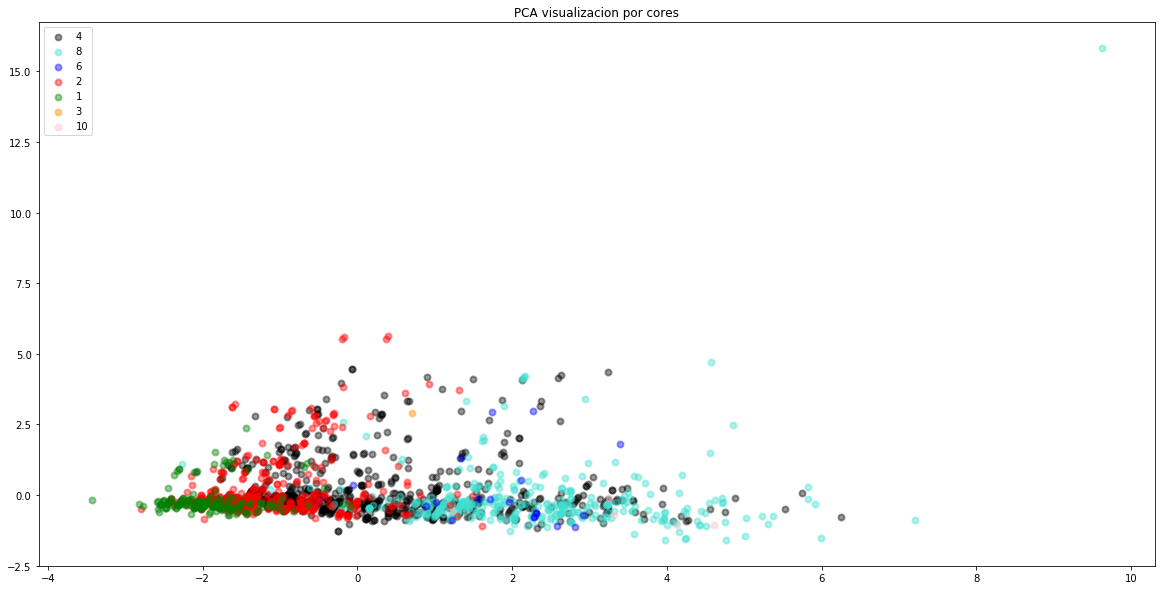

In [208]:


pca = PCA(n_components=2)
model = pca.fit(X)
print(model.explained_variance_)

X_r = model.transform(X)


plt.figure(figsize=(20, 10))
lw = 2
colors = ['black', 'turquoise', 'blue', 'RED', 'green', 'darkorange', 'pink']

for color, i, target_name in zip(colors, target_names, target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.4, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA visualizacion por cores')
plt.show()

# LDA

In [212]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

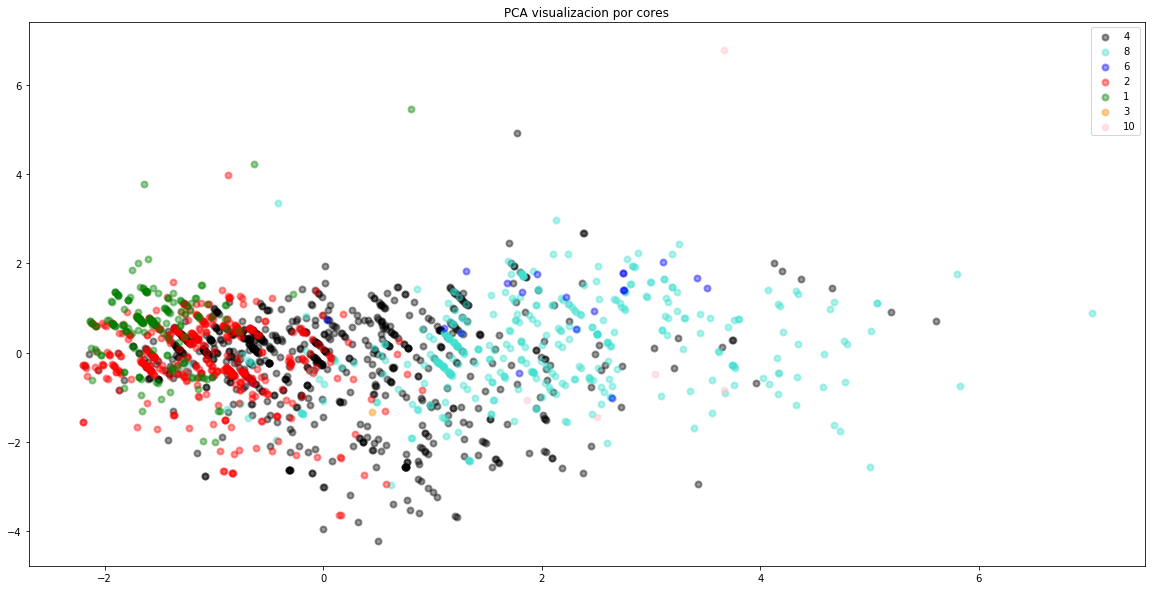

In [215]:
lda = LDA(n_components=2)
model = lda.fit(X, y)


X_r = model.transform(X)


plt.figure(figsize=(20, 10))
lw = 2
colors = ['black', 'turquoise', 'blue', 'RED', 'green', 'darkorange', 'pink']

for color, i, target_name in zip(colors, target_names, target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.4, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA visualizacion por cores')
plt.show()

# Isomap

In [209]:
from sklearn import manifold

In [210]:
n_neighbors = 10
X_iso = manifold.Isomap(n_neighbors=n_neighbors, 
                        n_components=2).fit_transform(X)

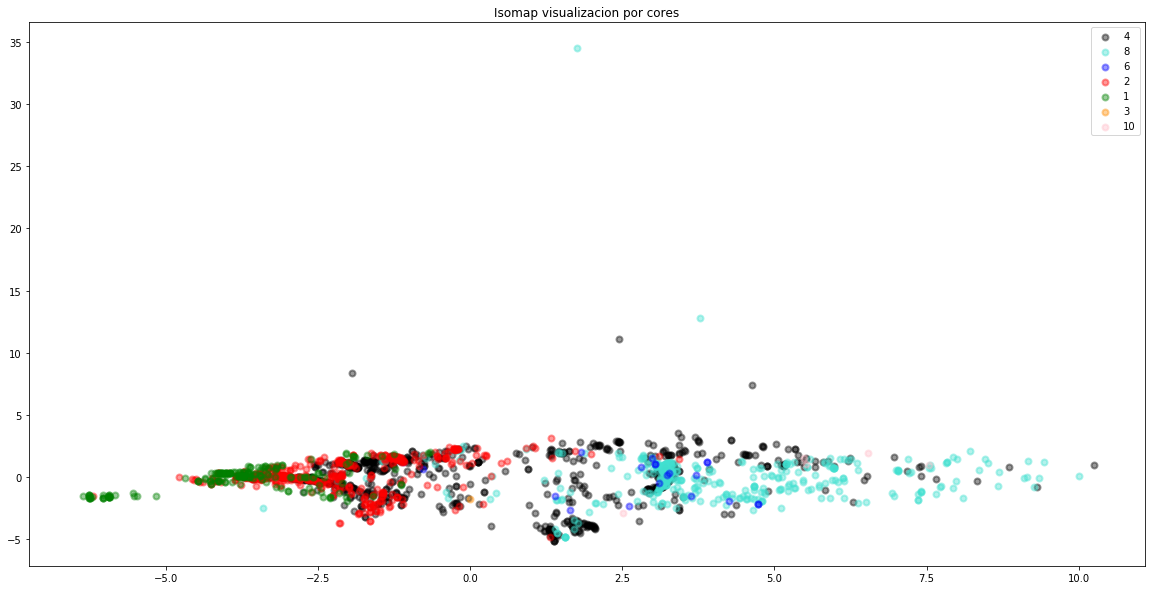

In [211]:

plt.figure(figsize=(20, 10))
lw = 2
colors = ['black', 'turquoise', 'blue', 'RED', 'green', 'darkorange', 'pink']

for color, i, target_name in zip(colors, target_names, target_names):
    plt.scatter(X_iso[y == i, 0], X_iso[y == i, 1], color=color, alpha=.4, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Isomap visualizacion por cores')
plt.show()